Let's get into TensorFlow and train a model to predict the number from hand writings.

In [2]:
#this loads the dependencies
import tensorflow as tf
import numpy as np

print("TensorFlow version is:", tf.__version__)
print("NumPy versio is:", np.__version__)

TensorFlow version is: 2.13.0
NumPy versio is: 1.24.3


In [3]:
mnist = tf.keras.datasets.mnist
# Loading the MNIST dataset. This dataset is divided into two parts:
# 1. Training data (`x_train`, `y_train`): The model learns from this data.
# 2. Test data (`x_test`, `y_test`): This data is used to evaluate how well the model has learned.
# `x_train` and `x_test` are arrays of grayscale image data with shapes (num_samples, 28, 28).
# `y_train` and `y_test` are arrays of digit labels with shapes (num_samples,).
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizing the image data from [0, 255] to [0, 1]. Normalization helps in faster convergence and-
# -reduces the chance of getting stuck in local optima during training.
# `x_train` and `x_test` are now arrays of floats with values ranging from 0 to 1.
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:

# Building a Sequential model using TensorFlow's Keras API. This model has four layers:
# 1. A Flatten layer that transforms each 2D image into a 1D array.
# 2. A Dense (fully connected) layer with 128 neurons and ReLU activation.
# 3. A Dropout layer that randomly sets 20% of the input units to 0 during training,
# which helps prevent overfitting.
# 4. Another Dense layer with 10 neurons, corresponding to the 10 classes of digits
# (0-9). This is the output layer.
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

# Making predictions using the untrained model. The model's weights are initially set randomly,
# so these predictions will not be accurate until after the model is trained.
# The prediction is made on the first image in the training set (`x_train[0]`). The output
# `predictions` is an array of logits, one for each class.
predictions = model(x_train[:1]).numpy()

print(predictions)

[[-0.74008256 -0.45165044 -0.23043317 -0.2241315   0.03049268 -0.56142485
  -0.0953109   0.07337412 -0.08400047 -0.58606756]]


In [5]:

# Applying the softmax function to the model's output. Softmax converts the model's logits (raw predictions)
# into probabilities by exponentiating each logit and then normalizing the results so they sum to 1.
# The output is an array of probabilities that represent the model's confidence that the input
# image belongs to each of the 10 classes of digits.
probs = tf.nn.softmax(predictions).numpy()

print(probs)

[[0.06140292 0.08193199 0.1022179  0.10286407 0.13269226 0.07341403
  0.11700645 0.13850605 0.11833735 0.07162702]]


In [6]:

# Defining the loss function for the model. The SparseCategoricalCrossentropy loss is used when
# there are two or more label classes.
# The `from_logits=True` argument means that the function should convert the logits into probabilities
# (using softmax) before calculating the loss.
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Calculating the loss of the model on the first training example. The loss is a measure of how far
# the model's predictions are from the true labels.
# A lower loss indicates that the model's predictions are closer to the true labels.
# The output is a single floating-point number representing the loss.
loss_value = loss_fn(y_train[1:2], predictions).numpy()

print(loss_value)

2.790298


In [7]:

# Compiling the model with the Adam optimizer and the previously defined loss function.
# The Adam optimizer is an algorithm for gradient-based optimization of stochastic objective functions.
# It uses moving averages of the parameters (momentum) to take bigger steps, and it works well in
# practice and requires little configuration.
# The loss function (loss_fn) is used to calculate the distance between the model's predictions and
# the actual values.
# During training, the model will try to minimize this distance.
# The 'accuracy' metric is used to measure the proportion of correct predictions out of all predictions.
# This metric will be calculated and printed during training for us to monitor.
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [8]:

# Training the model on the training data (`x_train` and `y_train`).
# The model will learn to associate images and labels.
# The training process will run for a fixed number of iterations through the dataset
# (10 times, as specified by `epochs=10`).
# Each iteration through the dataset is called an epoch.
# During each epoch, the model's parameters (weights and biases) will be updated to minimize
# the loss function.
# The loss and accuracy metrics are calculated after each epoch and printed out for us to monitor
# the training process.
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 851us/step - loss: 0.2964 - accuracy: 0.9138
Epoch 2/10
1875/1875 [==============================] - 2s 825us/step - loss: 0.1433 - accuracy: 0.9572
Epoch 3/10
1875/1875 [==============================] - 2s 860us/step - loss: 0.1075 - accuracy: 0.9675
Epoch 4/10
1875/1875 [==============================] - 2s 913us/step - loss: 0.0885 - accuracy: 0.9724
Epoch 5/10
1875/1875 [==============================] - 2s 878us/step - loss: 0.0749 - accuracy: 0.9761
Epoch 6/10
1875/1875 [==============================] - 2s 817us/step - loss: 0.0652 - accuracy: 0.9794
Epoch 7/10
1875/1875 [==============================] - 2s 860us/step - loss: 0.0605 - accuracy: 0.9805
Epoch 8/10
1875/1875 [==============================] - 2s 847us/step - loss: 0.0537 - accuracy: 0.9826
Epoch 9/10
1875/1875 [==============================] - 2s 863us/step - loss: 0.0498 - accuracy: 0.9833
Epoch 10/10
1875/1875 [==============================] - 2s 815u

In [9]:
# Evaluating the model's performance on the test data (`x_test` and `y_test`).
# This gives us an unbiased estimate of the model's performance on new, unseen data.
# The `verbose=2` argument controls the verbosity mode, 2 means that it will print one line per epoch.
# The function will output the loss value and metrics values for the model in test mode.
# In this case, it will return the loss and the accuracy of the model on the test data.
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0710 - accuracy: 0.9802 - 240ms/epoch - 767us/step


[0.07102128118276596, 0.9801999926567078]

In [10]:

# Defining a new model (`probability_model`) that appends a softmax layer to the trained model.
# The softmax function converts the model's logits (raw prediction values) into probabilities for each class.
# This makes the model's predictions more interpretable.
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

# Making predictions with the `probability_model` on the first two instances in the test set.
# The output is a 2x10 array of probabilities. Each row corresponds to an instance, and each column
# corresponds to a class.
# The probabilities in a row sum to 1, and the highest probability in a row indicates the predicted
# class for the corresponding instance.
predictions = probability_model(x_test[:2])

# Finding the predicted classes for the two instances by finding the index of the highest probability
# in each row.
# The output is an array of class labels.
predicted_classes = np.argmax(predictions, axis=1)

# Printing the predicted classes.
print(predicted_classes)


[7 2]


313/313 [==============================] - 0s 466us/step


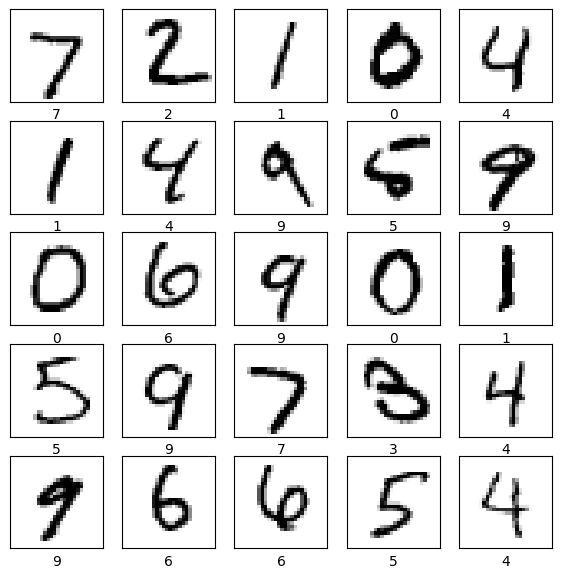

In [11]:
import matplotlib.pyplot as plt

predictions = model.predict(x_test)

plt.figure(figsize=(7,7))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(np.argmax(predictions[i]))
plt.show()
